# Actividad integradora - Visualización y Preprocesamiento de Dato
## Grupo 2
**Integrantes:**
- Francisco Lucich
- Esteban Luna
- Francisco Moretti
- Tomás Zubik

## Instalar dependecias

In [ ]:
%pip install -r requirements.txt 


# Parte A: Análisis de un dataset tabular
### Dataset: calidad de vinos

In [45]:
import kagglehub
import pandas as pd
import os

# Descargar y cargar el dataset
path = kagglehub.dataset_download("yasserh/wine-quality-dataset")
csv_file = os.path.join(path, "WineQT.csv")
df = pd.read_csv(csv_file)
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### Objetivo:
- ¿Cómo inciden los componentes del vino en su calidad?

In [46]:
df.pop('Id')
df.shape


(1143, 12)

In [47]:
df.dtypes
df = df.astype(float)
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

In [48]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [49]:

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Preprocesamiento

In [50]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Normalización
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[df.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])
df_normalized.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846,5.0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.358209,0.215548,0.494126,0.362205,0.209581,0.215385,5.0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.208955,0.169611,0.508811,0.409449,0.191617,0.215385,5.0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.238806,0.190813,0.582232,0.330709,0.149701,0.215385,6.0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846,5.0


### Visualizaciones y análisis

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

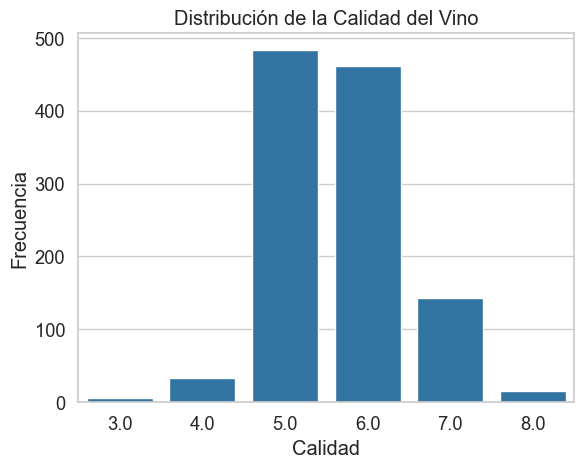

In [26]:
sns.countplot(data=df_normalized, x='quality')
plt.title('Distribución de la Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()


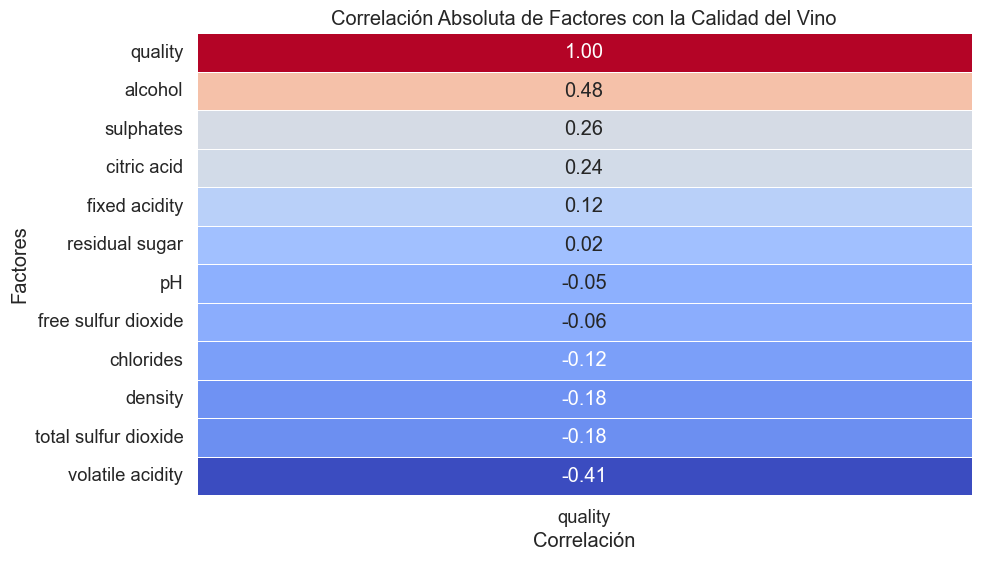

In [27]:
# Heatmap de correlaciones
quality_correlation = df_normalized.corr()[['quality']].sort_values(by='quality', ascending=False)
plt.figure(figsize=(10, 6))
sns.heatmap(quality_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=False)
plt.title('Correlación Absoluta de Factores con la Calidad del Vino')
plt.xlabel('Correlación')
plt.ylabel('Factores')
plt.show()

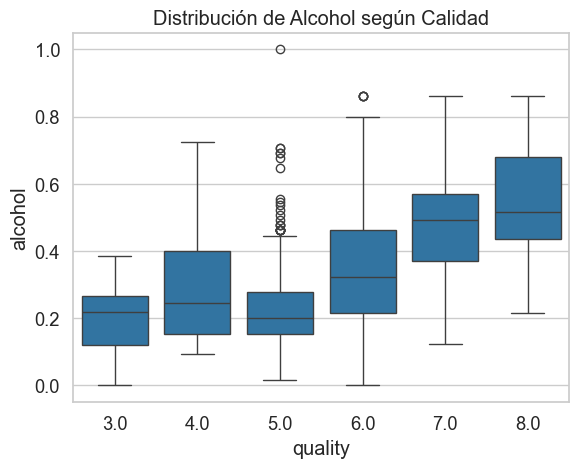

In [28]:
# Boxplot de alcohol según calidad
sns.boxplot(x=df_normalized['quality'], y=df_normalized['alcohol'])
plt.title('Distribución de Alcohol según Calidad')
plt.show()

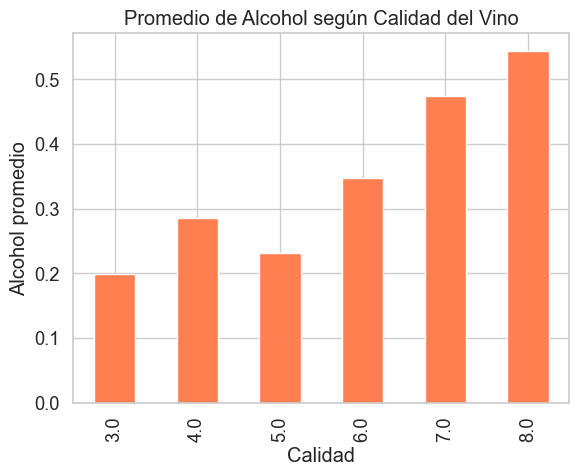

In [36]:
df_normalized.groupby('quality', observed=False)['alcohol'].mean().plot(kind='bar', color='coral')
plt.title('Promedio de Alcohol según Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Alcohol promedio')
plt.show()


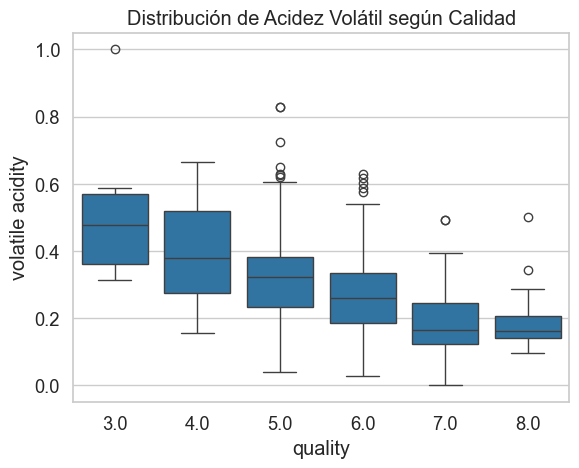

In [39]:
# Boxplot de volatile acid según calidad
sns.boxplot(x=df_normalized['quality'], y=df_normalized['volatile acidity'])
plt.title('Distribución de Acidez Volátil según Calidad')
plt.show()


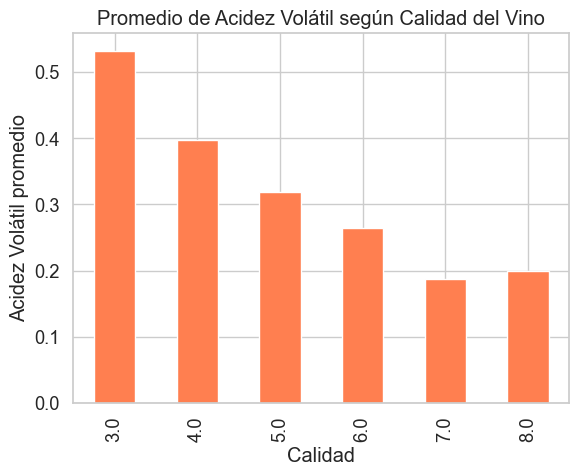

In [38]:
# Boxplot de volatile acid según calidad
df_normalized.groupby('quality', observed=False)['volatile acidity'].mean().plot(kind='bar', color='coral')
plt.title('Promedio de Acidez Volátil según Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Acidez Volátil promedio')
plt.show()

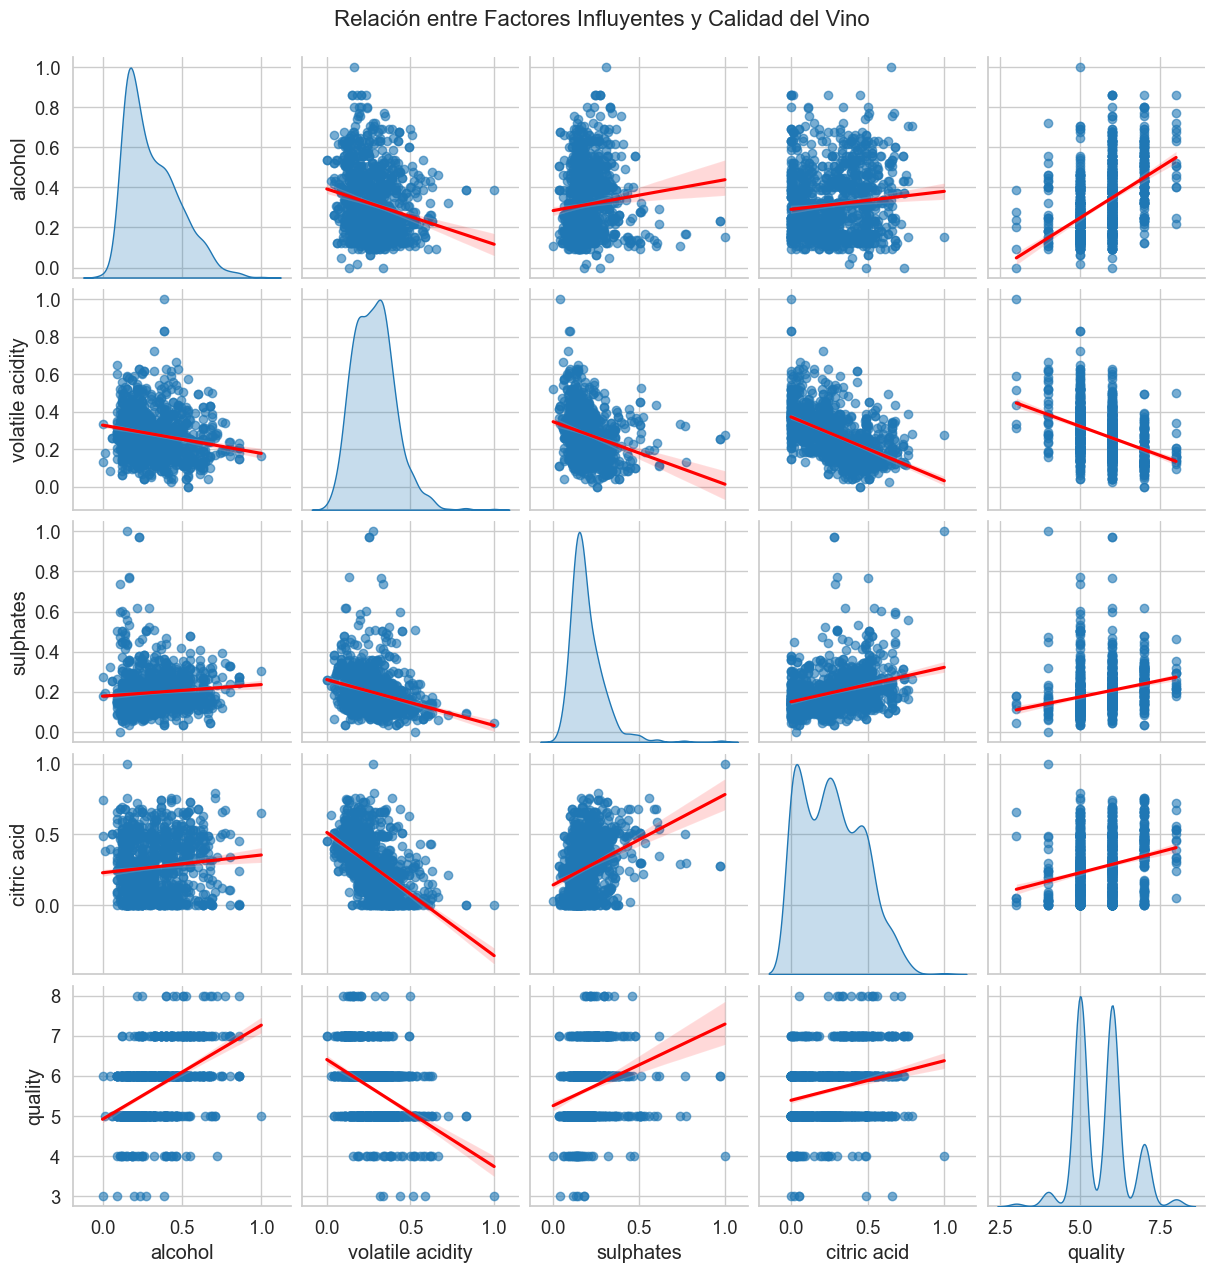

In [41]:
# Pairplot
sns.set_context("notebook", font_scale=1.2)
sns.set_style("whitegrid")
# Ensure the 'quality' column is numeric
df_normalized['quality'] = pd.to_numeric(df_normalized['quality'], errors='coerce')

pairplot = sns.pairplot(
    df_normalized,
    vars=['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'quality'],
    kind='reg',
    diag_kind='kde',
    plot_kws={'line_kws': {'color': 'red'}, 'scatter_kws': {'alpha': 0.6}}
)
pairplot.fig.suptitle('Relación entre Factores Influyentes y Calidad del Vino', y=1.02, fontsize=16)
plt.show()

### Conclusiones:

- **Relación entre factores y calidad del vino:**
    - El contenido de alcohol tiene una correlación positiva de aproximadamente 0.48 con la calidad.
    - La acidez volátil se correlaciona negativamente con la calidad (-0.41).
    - Sulfatos y ácido cítrico tienen correlaciones positivas moderadas.

- **Factores con menor influencia:**
    - Azúcar residual, pH y dióxido de azufre libre muestran correlaciones muy bajas.

- **Distribución de la calidad:**
    - La mayoría de los vinos tienen una calidad promedio (valores 5 y 6).

- **Relaciones visuales:**
    - Los gráficos confirman tendencias observadas en el análisis de correlación.

- **Preprocesamiento:**
    - No se encontraron valores nulos.
    - No se requería codificación de variables categóricas.
    - Se aplicó normalización con Min-Max Scaling.


## Parte B: Texto del PDF

In [ ]:
import string
import pymupdf
full_text = ""
try:
    with pymupdf.open(r'tipos_de_datos_-_ciencia_de_datos_0.pdf') as doc:
        for page_num in range(len(doc)):
            page = doc.load_page(page_num)  # or doc[page_num]
            text = page.get_text()
            full_text += text
            full_text += "\n--- Page End ---\n" # Optional: Add a separator between pages
        print(full_text)
except Exception as e:
    print(f"Error processing PDF: {e}")

texto_minusculas = full_text.lower()

texto_sin_signos = texto_minusculas.translate(str.maketrans('', '', string.punctuation))
text_cleaned = ' '.join(texto_sin_signos.split())
print(text_cleaned)

tokenizacion

In [ ]:
import nltk

nltk.download('punkt') 

nltk.download('stopwords')

nltk.download('wordnet')


In [ ]:
tokens = nltk.word_tokenize(text_cleaned)

print(tokens)

In [ ]:
stopwords = (nltk.corpus.stopwords.words('spanish'))


tokens_sin_stopwords = [token for token in tokens if token not in stopwords]

print(tokens_sin_stopwords)

In [ ]:
from nltk.stem.snowball import SnowballStemmer

# Inicializar el stemmer en español
stemmer = SnowballStemmer("spanish")

# Aplicar stemming
tokens_stemmed = [stemmer.stem(token) for token in tokens_sin_stopwords]

print(tokens_stemmed)


In [ ]:
from nltk.probability import FreqDist


# Calcular la frecuencia de cada token
frecuencia_tokens = FreqDist(tokens_stemmed)

tokens_mas_frecuentes = frecuencia_tokens.most_common(30)
print("Tokens más frecuentes:", tokens_mas_frecuentes)

Generar Resumen del texto usando un transformer

In [51]:
from transformers import pipeline

# 1. Crear un 'pipeline' para la tarea de resumen.
#    El modelo 'bart-large-cnn' es un buen modelo general para resumir.
#    Si quieres, puedes explorar otros modelos en Hugging Face Hub:
#    https://huggingface.co/models?filter=summarization
resumidor = pipeline("summarization", model="facebook/bart-large-cnn")

# 3. Generar el resumen. 'max_length' y 'min_length' controlan la longitud del resumen.
resumen = resumidor(text_cleaned, max_length=130, min_length=30, do_sample=False)

# 4. Imprimir el resumen generado.
print(resumen[0]['summary_text'])

Device set to use cuda:0


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


Graficar nube de palabras

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
# STOPWORDS son palabras irrelevantes a ignorar en la nube de palabras
mis_stopwords = set(STOPWORDS) # Empezamos con las de la librería
stopwords_es = {"de", "la", "el", "y", "en", "un", "una", "su", "para", "es", "se", "lo", "ya", "que",
                "del", "al", "con", "por", "mi", "tu", "como", "más", "este", "esta", "esto", "pero",
                "son", "las", "los", "nos", "nosotros", "vosotros", "ellos", "ellas", "fue", "fue",
                "ser", "tener", "hace", "finales", "medida", "trata", "ya", "cual", "gran", "cantidad"}
mis_stopwords.update(stopwords_es)

# Puedes preprocesar el texto aún más si lo deseas (ej. convertir a minúsculas, quitar puntuación)
# texto_procesado = texto_largo.lower()
# (Aquí, wordcloud ya maneja la tokenización y la conversión a minúsculas por defecto)

# Paso 4: Crear y configurar el objeto WordCloud
# Algunos parámetros comunes:
# - width, height: Ancho y alto de la imagen generada.
# - background_color: Color de fondo de la nube ('white', 'black', etc.).
# - stopwords: Un conjunto de palabras a ignorar.
# - max_words: El número máximo de palabras a mostrar en la nube.
# - min_font_size: El tamaño de fuente más pequeño a usar.
# - collocations: Si se deben incluir o no bigramas (pares de palabras). Por defecto es True.
#                  Ponerlo en False puede dar más énfasis a palabras individuales.
# - contour_width, contour_color: Para dibujar un contorno alrededor de las palabras o la máscara.
# - font_path: Ruta a un archivo de fuente .ttf o .otf si quieres usar una fuente específica.

nube = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    stopwords=mis_stopwords,
    max_words=150,
    min_font_size=10,
    collocations=False # True para incluir frases de dos palabras comunes
    # contour_width=1,
    # contour_color='steelblue',
    # font_path='ruta/a/tu/fuente.ttf' # Opcional
).generate(text_cleaned) # Generar la nube a partir del string

# Paso 5: Mostrar la nube de palabras usando matplotlib
plt.figure(figsize=(15, 7)) # Define el tamaño de la figura donde se mostrará
plt.imshow(nube, interpolation='bilinear') # 'bilinear' hace que la imagen se vea más suave
plt.axis("off") # Oculta los ejes (x, y)
plt.tight_layout(pad=0) # Ajusta el layout para que la nube ocupe todo el espacio
plt.show()

LANGCHAIN Text Splitter, actividad que surgio en clase sobre splittear texto

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=256,
        chunk_overlap=0,
        separators=[".", "!", "?", "\n\n", "\n", "\t", ",", ";", ":"],
        length_function=len,
    )


In [ ]:
chunks = text_splitter.split_text(texto_minusculas)

In [ ]:
print(f"Total chunks: {len(chunks)}")

for i, chunk in enumerate(chunks):
    print(f"Chunk {i+1}:")
    print(len(chunk), "characters")
    print("\n---\n")  # Separator between chunks